In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, gc, warnings
import random
import datetime
import warnings

from tqdm.notebook import tqdm
# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

warnings.filterwarnings('ignore')

In [2]:
pd.options.mode.chained_assignment = None
pd.options.display.max_seq_items = 500
pd.options.display.max_rows = 500
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
plt.rc('font', size=18)        
plt.rc('axes', titlesize=22)      
plt.rc('axes', labelsize=18)      
plt.rc('xtick', labelsize=12)     
plt.rc('ytick', labelsize=12)     
plt.rc('legend', fontsize=12)   

In [4]:
path = 'E:/pasca/Documents/Test/'
#show datapath
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:/pasca/Documents/Test/building_metadata.csv
E:/pasca/Documents/Test/sample_submission.csv
E:/pasca/Documents/Test/test.csv
E:/pasca/Documents/Test/train.csv
E:/pasca/Documents/Test/weather_test.csv
E:/pasca/Documents/Test/weather_train.csv


In [5]:
#data import
train_df = pd.read_csv(path + 'train.csv')
building_df = pd.read_csv(path + 'building_metadata.csv')
weather_df_1 = pd.read_csv(path + 'weather_train.csv')
weather_df = pd.read_csv(path + 'weather_train.csv',index_col= 'timestamp', parse_dates=True)
test_df = pd.read_csv(path + 'test.csv')
weather_test_df = pd.read_csv(path + 'weather_test.csv')

In [6]:
weather_test_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.80000,4.00000,11.70000,NaN,1021.40000,100.00000,3.60000
1,0,2017-01-01 01:00:00,17.80000,2.00000,12.80000,0.00000,1022.00000,130.00000,3.10000
2,0,2017-01-01 02:00:00,16.10000,0.00000,12.80000,0.00000,1021.90000,140.00000,3.10000
3,0,2017-01-01 03:00:00,17.20000,0.00000,13.30000,0.00000,1022.20000,140.00000,3.10000
4,0,2017-01-01 04:00:00,16.70000,2.00000,13.30000,0.00000,1022.30000,130.00000,2.60000


In [7]:
test_df.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [8]:
train_df = train_df.merge(building_df, left_on='building_id',right_on='building_id',how='left')
train_df = train_df.merge(weather_df_1,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
test_df = test_df.merge(building_df, left_on='building_id',right_on='building_id',how='left')
test_df = test_df.merge(weather_test_df,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])

In [9]:
train_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.00000,0,Education,7432,2008.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000
1,1,0,2016-01-01 00:00:00,0.00000,0,Education,2720,2004.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000
2,2,0,2016-01-01 00:00:00,0.00000,0,Education,5376,1991.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000
3,3,0,2016-01-01 00:00:00,0.00000,0,Education,23685,2002.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000
4,4,0,2016-01-01 00:00:00,0.00000,0,Education,116607,1975.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000


In [10]:
train_df.timestamp = pd.to_datetime(train_df.timestamp)

In [11]:
train_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.00000,0,Education,7432,2008.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000
1,1,0,2016-01-01,0.00000,0,Education,2720,2004.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000
2,2,0,2016-01-01,0.00000,0,Education,5376,1991.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000
3,3,0,2016-01-01,0.00000,0,Education,23685,2002.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000
4,4,0,2016-01-01,0.00000,0,Education,116607,1975.00000,NaN,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int64         
 1   meter               int64         
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         object        
 6   square_feet         int64         
 7   year_built          float64       
 8   floor_count         float64       
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
 16  meter_reading_log   float64       
dtypes: datetime64[ns](1), float64(11), int64(4), object(1)
memory usage: 2.7+ GB


In [63]:
train_df.timestamp.min()

Timestamp('2016-01-01 00:00:00')

In [64]:
train_df.timestamp.max()

Timestamp('2016-12-31 23:00:00')

In [12]:
#plt.rcParams.update({'figure.autolayout': True})

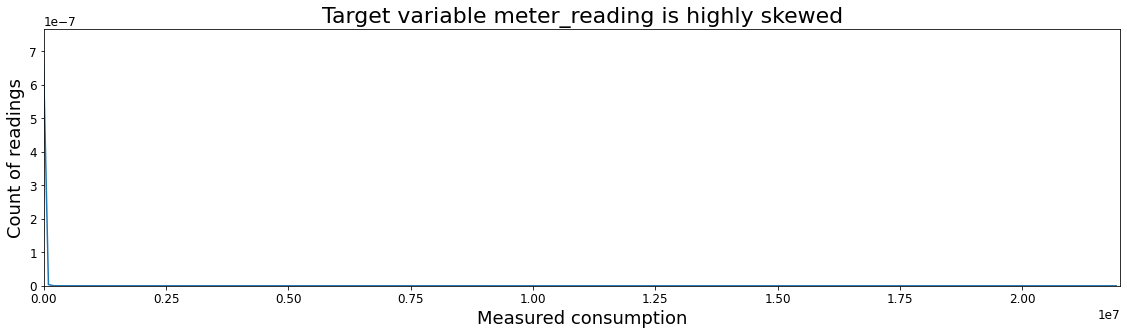

In [13]:
%%time
plt.figure(figsize=(16,5))
sns.distplot(train_df.meter_reading, hist=False)
plt.title(f"Target variable meter_reading is highly skewed")
plt.ylabel("Count of readings")
plt.xlabel(f"Measured consumption")
plt.xlim(0, train_df.meter_reading.max() + 100_000)
plt.tight_layout()
plt.show()

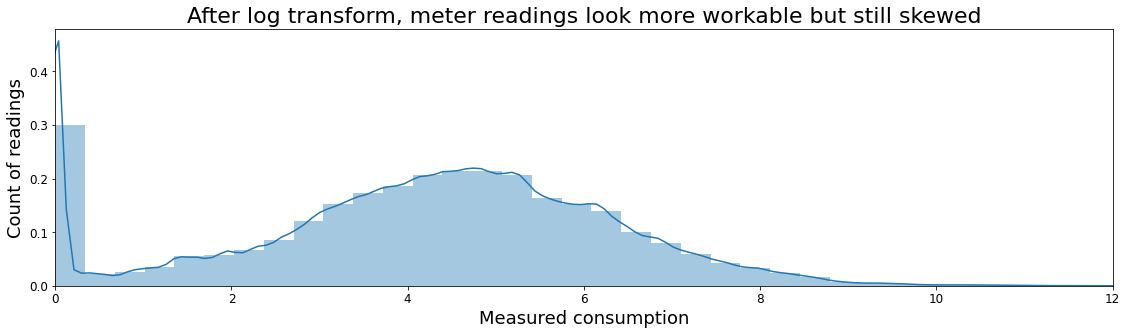

Wall time: 2min 38s


In [36]:
%%time
plt.figure(figsize=(16,5))
sns.distplot(np.log1p(train_df.meter_reading))
plt.title(f"After log transform, meter readings look more workable but still skewed")
plt.ylabel("Count of readings")
plt.xlabel(f"Measured consumption")
plt.xlim(0, 12)
plt.tight_layout()
plt.show()

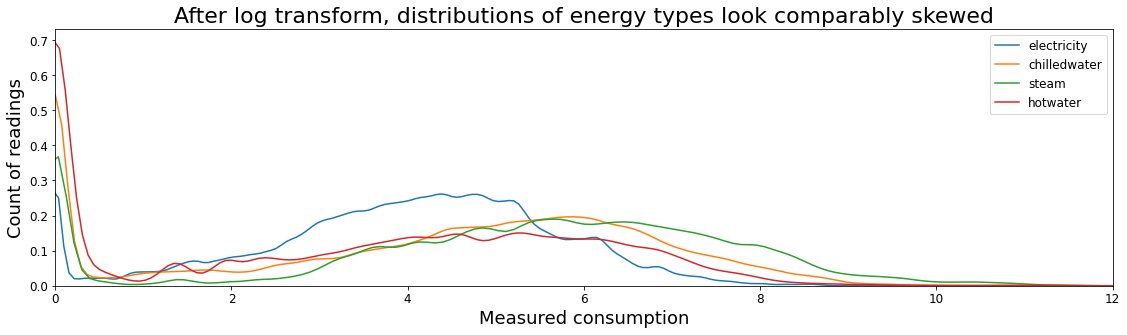

Wall time: 2min 14s


In [38]:
%%time
plt.figure(figsize=(16,5))
for idx in range(0,4):
    sns.distplot(np.log1p(train_df[train_df.meter==idx].meter_reading), hist=False, label=['electricity', 'chilledwater', 'steam', 'hotwater'][idx])
plt.title(f"After log transform, distributions of energy types look comparably skewed")
plt.ylabel("Count of readings")
plt.xlabel(f"Measured consumption")
plt.legend()
plt.xlim(0, 12)
plt.tight_layout()
plt.show()

In [14]:
test1 = train_df["year_built"].value_counts()
print(test1)


1976.00000    531091
1964.00000    260737
1966.00000    228062
2006.00000    194814
1968.00000    187867
1970.00000    178664
2007.00000    176604
1975.00000    173100
1967.00000    172131
1960.00000    168793
2004.00000    163370
1989.00000    155155
1919.00000    149328
2010.00000    139269
1930.00000    126192
2001.00000    118453
1956.00000    116121
2014.00000    111841
1963.00000    111518
2005.00000    110774
2002.00000    106974
1965.00000     99717
2013.00000     95082
1959.00000     91972
1951.00000     87925
1969.00000     87769
1912.00000     85772
1940.00000     85097
1958.00000     85068
1923.00000     84611
1953.00000     81152
1990.00000     77188
1974.00000     75091
1913.00000     74612
1999.00000     74405
1955.00000     73293
1995.00000     72784
1957.00000     72018
1971.00000     71824
1981.00000     70667
1982.00000     70260
1979.00000     70213
2012.00000     70211
2016.00000     69572
2003.00000     68724
2011.00000     68023
1962.00000     66046
1993.00000   

0.00000      1873976
20.00000       23363
2.93070        23181
36.60000       22154
8.79210        21787
              ...   
27.80310           1
58.97510           1
90.48840           1
370.93900          1
55.62410           1
Name: meter_reading, Length: 1688175, dtype: int64


<AxesSubplot:>

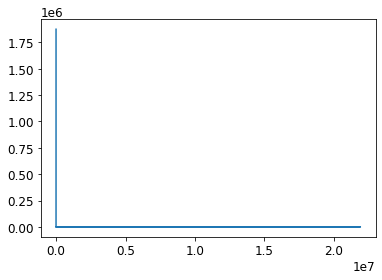

In [15]:
fig, ax_0 = plt.subplots()
test = train_df["meter_reading"].value_counts()
print(test)
test.plot()

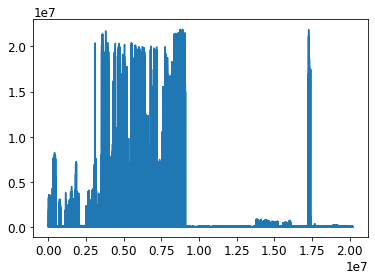

In [16]:
fig, ax_1 = plt.subplots()
ax_1.plot("meter_reading", data = train_df)

array([[<AxesSubplot:title={'center':'meter_reading'}>]], dtype=object)

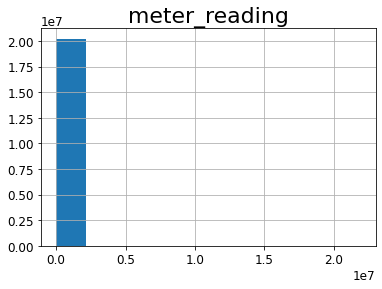

In [17]:
train_df.hist("meter_reading")

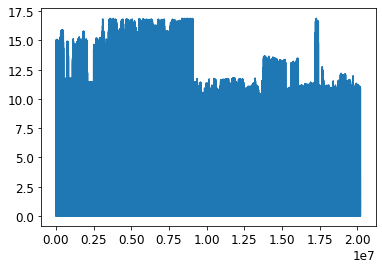

In [18]:
target = np.log1p(train_df["meter_reading"])
plt.plot(target)

In [19]:
train_df["meter_reading_log"] = np.log1p(train_df["meter_reading"])
train_df.sample(7)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter_reading_log
3422785,941,0,2016-03-05 08:00:00,3.36000,9,Lodging/residential,8079,NaN,NaN,14.40000,NaN,12.20000,0.00000,1018.90000,170.00000,3.10000,1.47247
20029148,1297,0,2016-12-28 16:00:00,44.40730,14,Office,21469,NaN,NaN,5.00000,NaN,-4.40000,0.00000,1020.40000,270.00000,3.60000,3.81567
13410073,1335,0,2016-09-01 21:00:00,220.05000,15,Public services,136817,1953.00000,NaN,21.10000,NaN,11.70000,NaN,1015.40000,350.00000,5.10000,5.39839
8924287,1269,3,2016-06-13 16:00:00,231.73800,14,Healthcare,56388,NaN,NaN,20.60000,0.00000,8.90000,0.00000,1010.90000,300.00000,4.10000,5.44991
4232315,1197,0,2016-03-21 09:00:00,348.05100,13,Services,50552,NaN,NaN,-1.10000,NaN,-5.60000,0.00000,1021.90000,0.00000,0.00000,5.85522
8763808,794,3,2016-06-10 20:00:00,298.60000,7,Education,731945,1969.00000,11.00000,18.70000,NaN,7.90000,NaN,1016.10000,300.00000,3.60000,5.70245
15698973,978,1,2016-10-12 09:00:00,590.16300,9,Education,258491,NaN,NaN,18.30000,0.00000,15.00000,0.00000,1016.80000,0.00000,0.00000,6.38209


array([[<AxesSubplot:title={'center':'meter_reading_log'}>]], dtype=object)

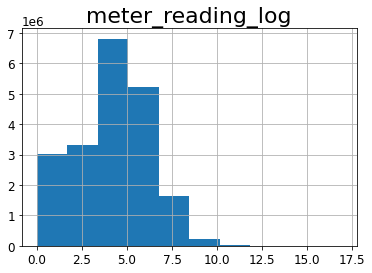

In [20]:
train_df.hist("meter_reading_log")

[(0.0, 1500.0),
 (0.0, 20000000.0),
 Text(0.5, 0, 'builduing_id'),
 Text(0, 0.5, 'meter_reading')]

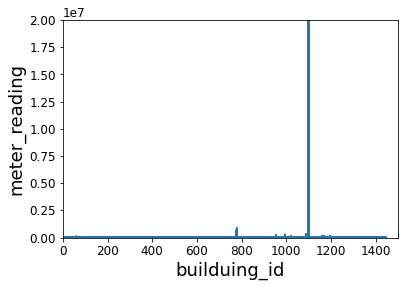

In [21]:
fig, ax = plt.subplots()
ax.plot("building_id", "meter_reading", data = train_df)
ax.set(xlim=[0, 1500],ylim=[0,20000000],xlabel='builduing_id', ylabel='meter_reading')

<AxesSubplot:xlabel='count', ylabel='primary_use'>

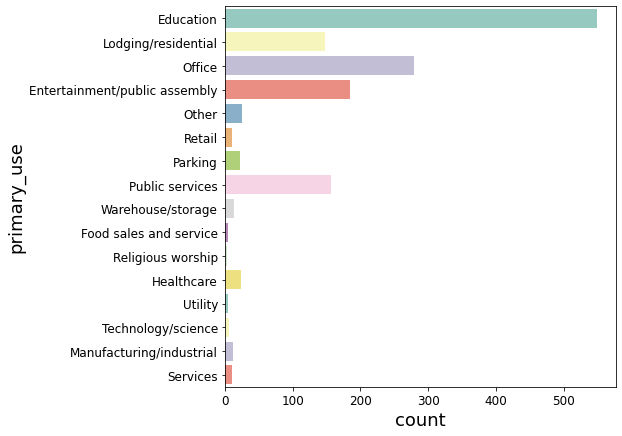

In [59]:
plt.figure(figsize=(7,7))
sns.countplot(y= building_df.primary_use,palette="Set3")

<AxesSubplot:xlabel='count', ylabel='site_id'>

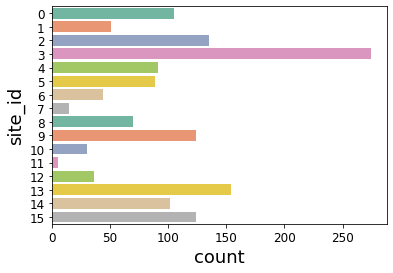

In [23]:
sns.countplot(y= building_df.site_id,palette="Set2")

In [24]:
#sns.countplot(y= train_df.meter_reading, palette="Set2")

<AxesSubplot:xlabel='timestamp'>

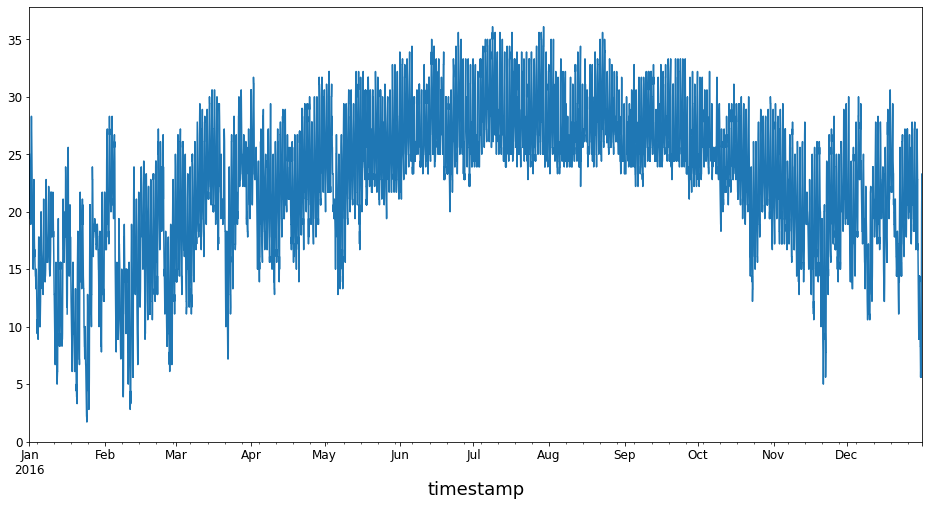

In [25]:
trainsite1 = weather_df[weather_df['site_id'] == 0]
trainsite1.air_temperature.plot(figsize=(16,8))

Text(0.5, 1.0, 'Histogram of wind Speed')

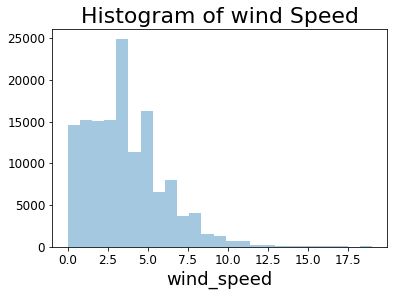

In [26]:
sns.distplot(weather_df.wind_speed, bins=25, hist=True,kde=False, rug=False ).set_title("Histogram of wind Speed")

In [27]:
Weather = weather_df.copy()

In [28]:


Weather.head()



,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0,25.00000,6.00000,20.00000,NaN,1019.70000,0.00000,0.00000
2016-01-01 01:00:00,0,24.40000,NaN,21.10000,-1.00000,1020.20000,70.00000,1.50000
2016-01-01 02:00:00,0,22.80000,2.00000,21.10000,0.00000,1020.20000,0.00000,0.00000
2016-01-01 03:00:00,0,21.10000,2.00000,20.60000,0.00000,1020.10000,0.00000,0.00000
2016-01-01 04:00:00,0,20.00000,2.00000,20.00000,-1.00000,1020.00000,250.00000,2.60000


Text(0.5, 1.0, 'Histogram of Year Built')

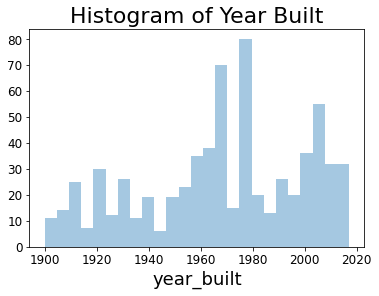

In [29]:


sns.distplot(building_df.year_built, bins=25, hist=True,kde=False, rug=False ).set_title("Histogram of Year Built")



<AxesSubplot:title={'center':'Count of meter_readings per meter'}>

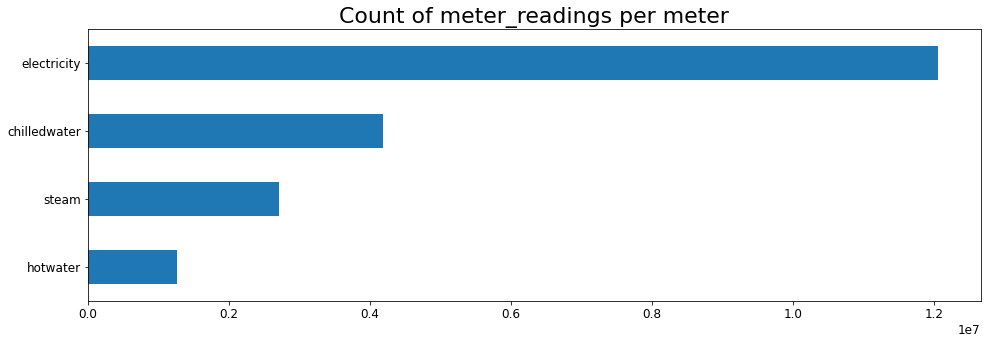

In [62]:
plt.figure(figsize=(16,5))
tmp_df = train_df.meter.value_counts()
tmp_df.index = ['electricity', 'chilledwater', 'steam', 'hotwater']
plt.title("Count of meter_readings per meter")
tmp_df.sort_values().plot(kind="barh")

<AxesSubplot:title={'center':'Energieverbrauch pro Zählerstand'}>

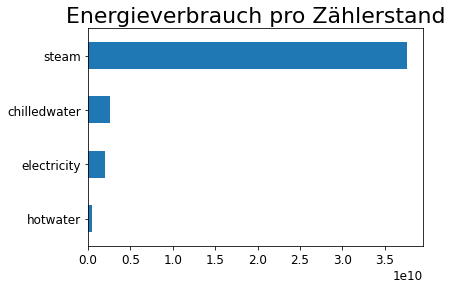

In [31]:
tmp_df = train_df.groupby("meter").meter_reading.sum()
tmp_df.index = ['electricity', 'chilledwater', 'steam', 'hotwater']
plt.title("Energieverbrauch pro Zählerstand")
tmp_df.sort_values().plot(kind="barh")

<AxesSubplot:>

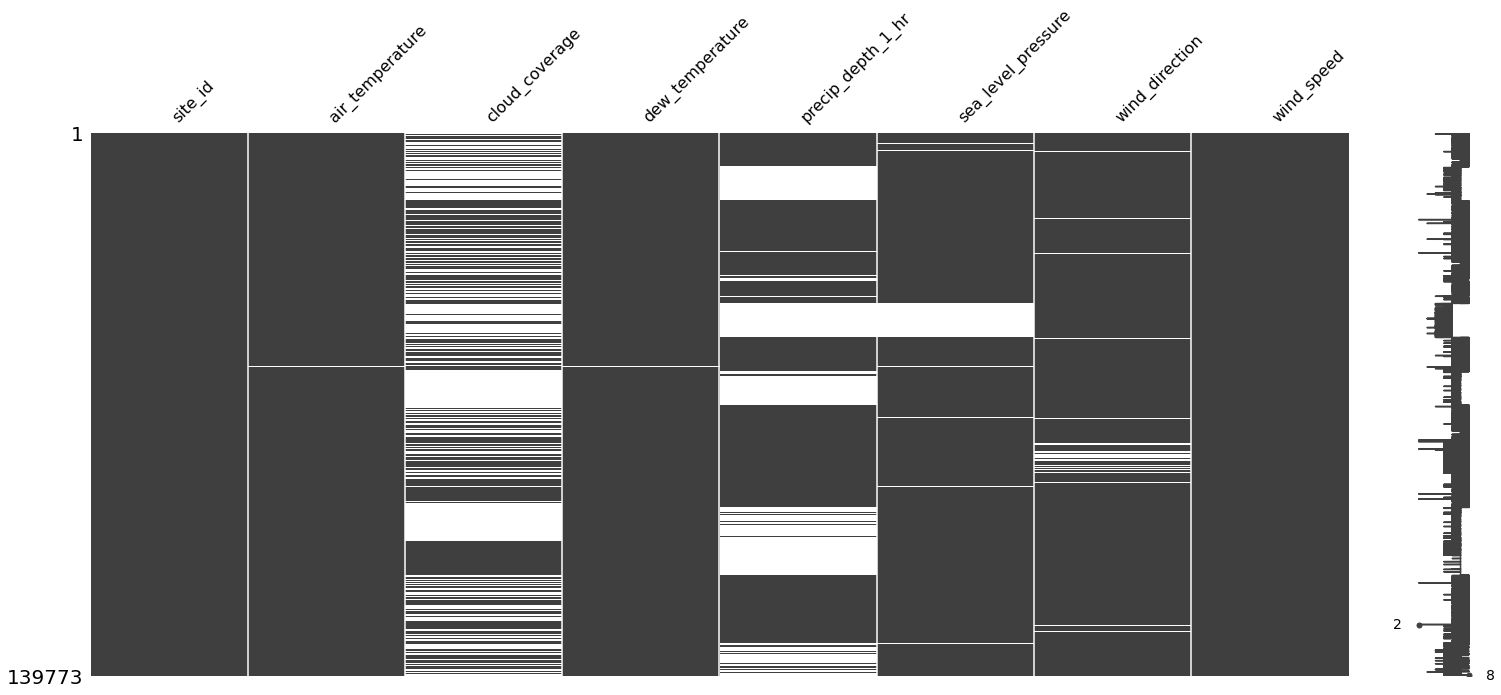

In [32]:
msno.matrix(weather_df)

<AxesSubplot:>

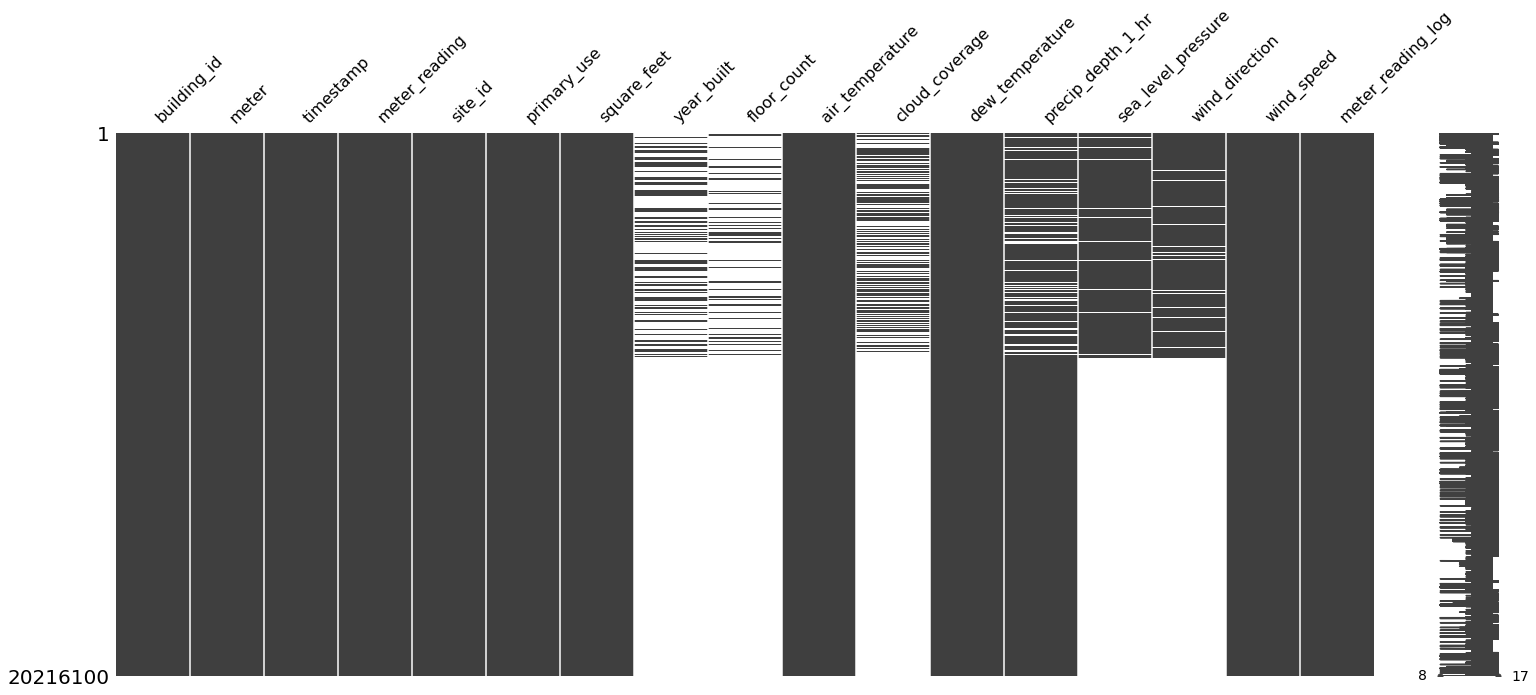

In [33]:
msno.matrix(train_df)

In [34]:
train_df.groupby("building_id").meter_reading.sum().sort_values(ascending=False)[:5]

building_id
1099   33506195415.40700
778      440411443.01820
1168     428634168.39040
1197     390400248.10460
1159     314241460.21400
Name: meter_reading, dtype: float64

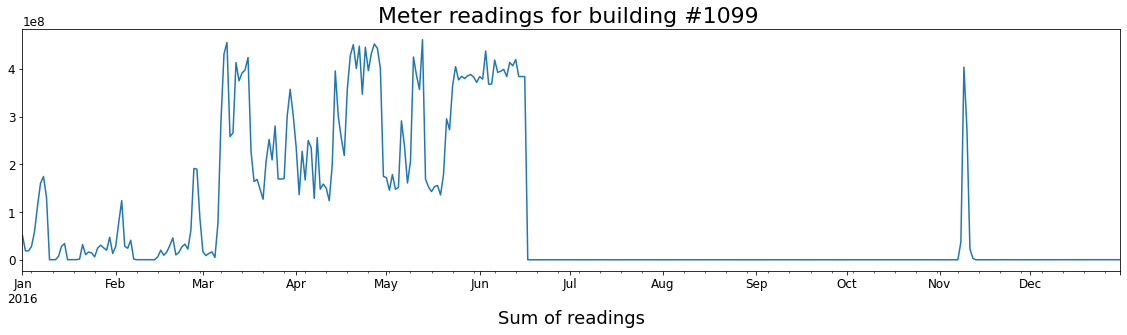

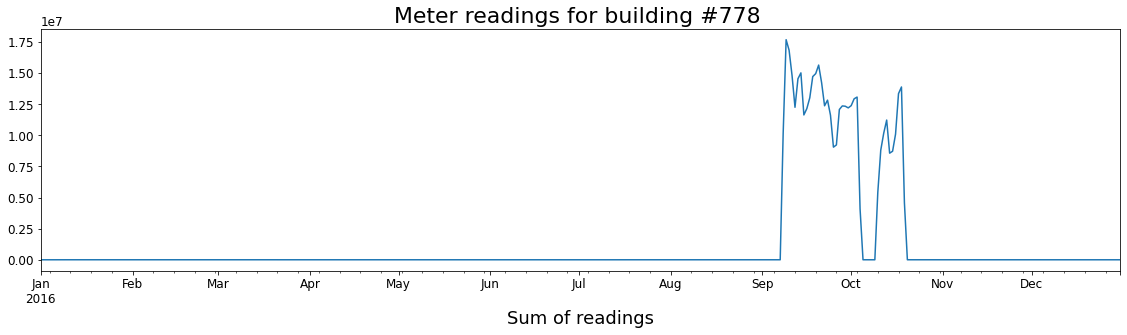

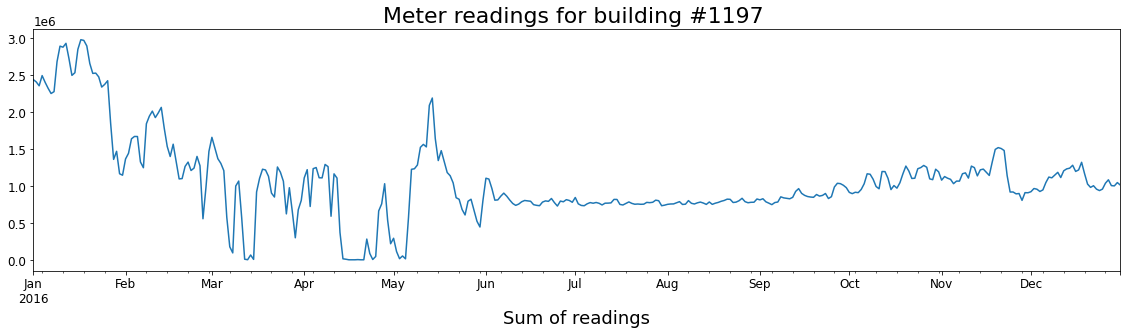

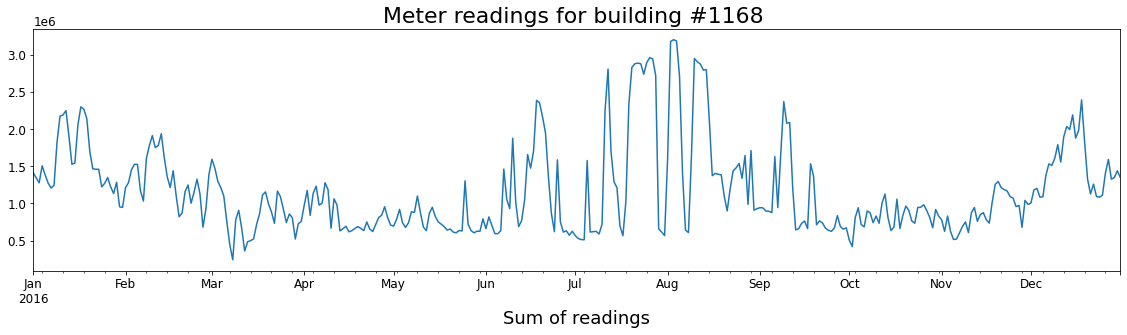

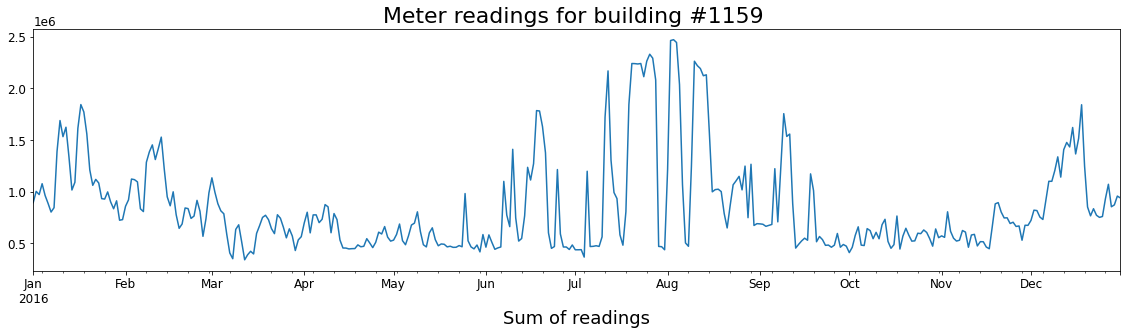

In [61]:

for bldg_id in [1099, 778, 1197, 1168, 1159]:
    plt.figure(figsize=(16,5))
    tmp_df = train_df[train_df.building_id == bldg_id].copy()
    tmp_df.set_index("timestamp", inplace=True)
    tmp_df.resample("D").meter_reading.sum().plot()
    plt.title(f"Meter readings for building #{bldg_id} ")
    plt.xlabel("Sum of readings")
    plt.tight_layout()
    plt.show()